In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
from tabulate import tabulate
import statsmodels
import math
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

In [14]:
# Reading data from the csv
df = pd.read_csv(r"..\Excels\merged_table.csv")
df.columns
dummy_years = pd.get_dummies(df['year'], prefix='year')
gwq='calcium'
# Concatenate the original DataFrame with the dummy variable DataFrame
df = pd.concat([df, dummy_years], axis=1)

# Convert numeric columns to appropriate data type
df['SDP'] = pd.to_numeric(df['SDP'], errors='coerce')
df[gwq] = pd.to_numeric(df[gwq], errors='coerce')
df['Gini'] = pd.to_numeric(df['Gini'], errors='coerce')

# Drop rows with NaN values
df.dropna(subset=['SDP', gwq,'Gini'], inplace=True)

x = df['SDP'].values.reshape(-1, 1)  # Independent variable
y = df[gwq].values  # Dependent variable
x2 = x ** 2
x3 = x ** 3
x4 = df['Gini'].values.reshape(-1, 1)  # Fourth variable

# Create polynomial features
poly = PolynomialFeatures(degree=3)  # You can change the degree here
X_poly = poly.fit_transform(x)

# Add fourth variable
X_poly = np.concatenate((X_poly, x4), axis=1)

final_x = X_poly.copy()
years = ['year_2000', 'year_2001', 'year_2002', 'year_2003', 'year_2004', 'year_2005', 'year_2006', 'year_2007', 'year_2008', 'year_2009', 'year_2010', 'year_2011', 'year_2012', 'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017']

for yr in years:
    curr_year = np.array(df[yr]).reshape(-1, 1)  # Reshape to make it a column vector
    new_x_poly = []
    
    # Multiply each element of X_poly by the current year and append to new_x_poly
    for i in range(len(X_poly)):
        l = []
        for j in range(len(X_poly[i])):
            l.append(X_poly[i][j] * curr_year[i])
        new_x_poly.append(l)
        
    # Convert new_x_poly to numpy array
    new_x_poly = np.array(new_x_poly).reshape(-1, len(X_poly[0]))  # Reshape to match final_x
    
    # Add new_x_poly to final_x by horizontally stacking them
    final_x = np.hstack((final_x, new_x_poly))
    
    # print(final_x.shape)



In [15]:

y = df[gwq].values  # Dependent variable

dummy_year_model = LinearRegression(fit_intercept=True).fit(final_x, y)

# Get coefficients and intercept
intercept = dummy_year_model.intercept_
coefficients = dummy_year_model.coef_

# Print coefficients
print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Evaluate R^2
r_squared = dummy_year_model.score(final_x, y)
print("R^2:", r_squared)

Intercept: 20.2569417446771
Coefficients: [-1.24566708e-08  2.68192462e-04 -4.70576851e-10  2.45960888e-16
  3.91266543e-08 -7.82222660e-09  8.07520043e-04 -6.15941384e-09
  1.15342836e-14  1.39817822e-07  1.52751189e-07  6.24165941e-04
 -4.27064978e-09  6.66420564e-15  1.09810265e-07 -7.18997540e-09
  8.56888689e-04 -5.89584828e-09  9.67917857e-15  1.81256362e-07
  7.94467894e-08  2.43263559e-03 -2.16615540e-08  4.21130695e-14
  2.41557262e-08  1.19742099e-08  8.23771576e-04 -6.73819106e-09
  1.24024175e-14  3.33566320e-09  4.30393535e-10  5.52793376e-04
 -3.30948858e-09  4.77718451e-15  3.05527551e-10 -2.85362505e-09
  3.51130482e-04 -1.24737117e-09  1.07951300e-15 -4.50128529e-10
 -2.99817775e-09  4.01255554e-04 -1.93446576e-09  2.21827764e-15
 -5.41594230e-10 -1.29163432e-09  4.26381045e-04 -2.08336980e-09
  2.34567140e-15 -4.29071537e-11 -5.80215680e-09  2.06333346e-04
 -9.63405915e-10  1.06425285e-15 -1.39353782e-09 -5.36951244e-09
 -9.94127701e-06  1.16057085e-09 -3.25889489e-15

In [23]:
# Calculate the residuals
y_pred = dummy_year_model.predict(final_x)
residuals = y - y_pred

# Number of observations
n = len(y)

# Number of predictors (including intercept)
p = final_x.shape[1]

# Degrees of freedom
df = n - p

# Residual standard error (RSE)
RSE = np.sqrt(np.sum(residuals**2) / df)

# Calculate standard errors of coefficients
XtX_inv = np.linalg.inv(final_x.T @ final_x)
std_errs = np.sqrt(np.diagonal(RSE**2 * XtX_inv))

# Calculate t-statistics
t_stats = coefficients / std_errs

# Print results
for i, yr in enumerate(years):
    print(f"\nYear: {yr}")
    print("Coefficient:", coefficients[i])
    print("Standard Error:", std_errs[i])
    print("T-Statistic:", t_stats[i])



Year: year_2000
Coefficient: -1.2456670805982618e-08
Standard Error: nan
T-Statistic: nan

Year: year_2001
Coefficient: 0.00026819246166921945
Standard Error: nan
T-Statistic: nan

Year: year_2002
Coefficient: -4.705768511170737e-10
Standard Error: nan
T-Statistic: nan

Year: year_2003
Coefficient: 2.459608877763159e-16
Standard Error: nan
T-Statistic: nan

Year: year_2004
Coefficient: 3.912665428913709e-08
Standard Error: 0.9012924007044865
T-Statistic: 4.3411721055846165e-08

Year: year_2005
Coefficient: -7.822226597780064e-09
Standard Error: nan
T-Statistic: nan

Year: year_2006
Coefficient: 0.0008075200426530361
Standard Error: 0.002489685566865985
T-Statistic: 0.32434619592125524

Year: year_2007
Coefficient: -6.159413838951884e-09
Standard Error: 1.7993214935594007e-08
T-Statistic: -0.3423186940743641

Year: year_2008
Coefficient: 1.1534283570878612e-14
Standard Error: nan
T-Statistic: nan

Year: year_2009
Coefficient: 1.3981782218303167e-07
Standard Error: nan
T-Statistic: nan


C:\Users\baljyot\AppData\Local\Temp\ipykernel_23736\1269444955.py:19: RuntimeWarning: invalid value encountered in sqrt
  std_errs = np.sqrt(np.diagonal(RSE**2 * XtX_inv))


C:\Users\baljyot\AppData\Local\Temp\ipykernel_23736\3738586052.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='year', y='calcium', order=sorted(df['year'].unique()), palette=colors)


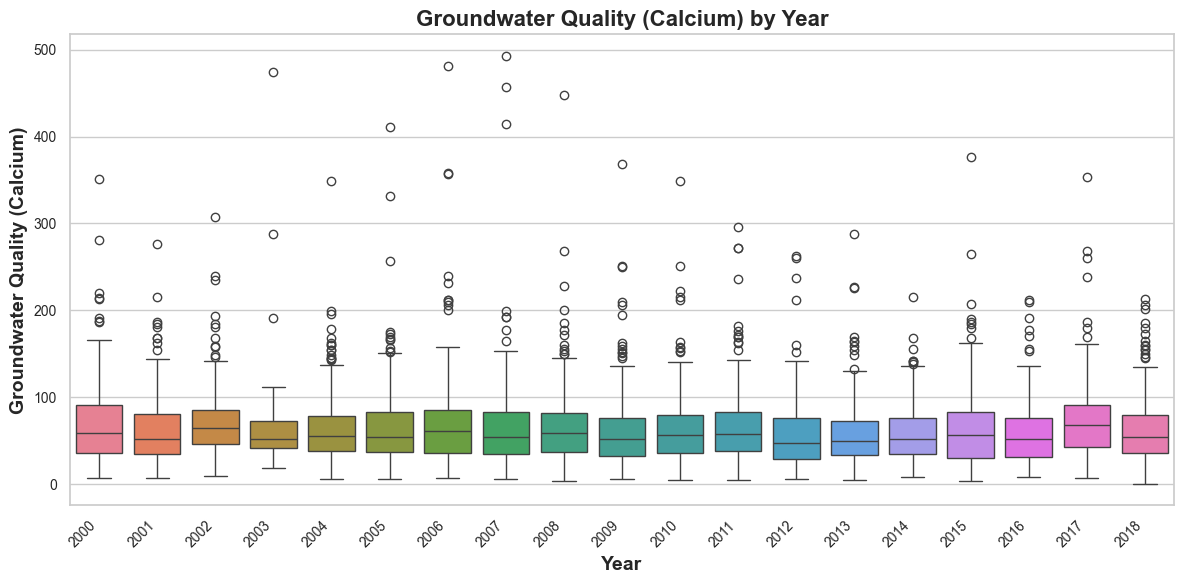

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Define a custom color palette
colors = sns.color_palette("husl", n_colors=len(year_columns))

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='year', y='calcium', order=sorted(df['year'].unique()), palette=colors)
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Groundwater Quality (Calcium)', fontsize=14, fontweight='bold')
plt.title('Groundwater Quality (Calcium) by Year', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


C:\Users\baljyot\AppData\Local\Temp\ipykernel_23736\3295149438.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='year', y='calcium', order=sorted(df['year'].unique()), jitter=True, palette="husl", alpha=0.6)


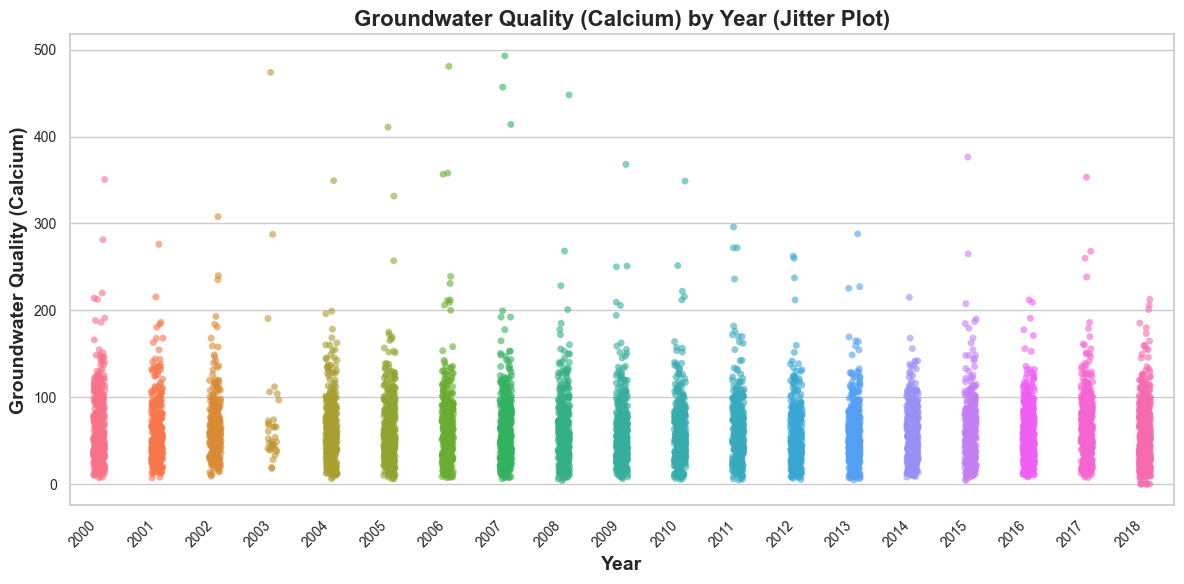

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create the jitter plot with alpha gradient
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='year', y='calcium', order=sorted(df['year'].unique()), jitter=True, palette="husl", alpha=0.6)
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Groundwater Quality (Calcium)', fontsize=14, fontweight='bold')
plt.title('Groundwater Quality (Calcium) by Year (Jitter Plot)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
